# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="
   
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{weather_api_key}&q={city}"
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_json = requests.get(city_url).json()
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        #print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | avera
Processing Record 5 of Set 1 | mitsamiouli
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | nakhon phanom
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | camacha
Processing Record 12 of Set 1 | bitung
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | burley
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | catanduva
Processing Record 18 of Set 1 | leningradskiy
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | hirara
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | h

Processing Record 44 of Set 4 | najran
Processing Record 45 of Set 4 | lethem
Processing Record 46 of Set 4 | cam pha
'coord'
Processing Record 47 of Set 4 | aykhal
Processing Record 48 of Set 4 | marsa matruh
Processing Record 49 of Set 4 | orangeburg
Processing Record 0 of Set 5 | mangai
Processing Record 1 of Set 5 | stykkisholmur
Processing Record 2 of Set 5 | nuevitas
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | karlskrona
Processing Record 5 of Set 5 | ardakan
Processing Record 6 of Set 5 | henties bay
Processing Record 7 of Set 5 | porto santo
Processing Record 8 of Set 5 | padang
Processing Record 9 of Set 5 | lebu
Processing Record 10 of Set 5 | vostok
Processing Record 11 of Set 5 | sao filipe
Processing Record 12 of Set 5 | maragogi
Processing Record 13 of Set 5 | torbay
Processing Record 14 of Set 5 | ejby
Processing Record 15 of Set 5 | riachao
Processing Record 16 of Set 5 | san carlos de bariloche
Processing Record 17 of Set 5 | kieta
Processing 

Processing Record 41 of Set 8 | semirom
Processing Record 42 of Set 8 | richards bay
Processing Record 43 of Set 8 | faanui
Processing Record 44 of Set 8 | prescott
Processing Record 45 of Set 8 | warqla
'coord'
Processing Record 46 of Set 8 | kollumerland
'coord'
Processing Record 47 of Set 8 | finschhafen
Processing Record 48 of Set 8 | amga
Processing Record 49 of Set 8 | sheridan
Processing Record 0 of Set 9 | atar
Processing Record 1 of Set 9 | lumeje
Processing Record 2 of Set 9 | nosy varika
Processing Record 3 of Set 9 | olinda
Processing Record 4 of Set 9 | nouakchott
Processing Record 5 of Set 9 | grakhovo
Processing Record 6 of Set 9 | seydi
Processing Record 7 of Set 9 | seshcha
Processing Record 8 of Set 9 | baie-comeau
Processing Record 9 of Set 9 | kahului
Processing Record 10 of Set 9 | mocuba
Processing Record 11 of Set 9 | kavieng
Processing Record 12 of Set 9 | saint-francois
Processing Record 13 of Set 9 | vung tau
Processing Record 14 of Set 9 | shemordan
Processin

Processing Record 34 of Set 12 | wahran
'coord'
Processing Record 35 of Set 12 | berlevag
Processing Record 36 of Set 12 | fukue
Processing Record 37 of Set 12 | san patricio
Processing Record 38 of Set 12 | surt
Processing Record 39 of Set 12 | marshall
Processing Record 40 of Set 12 | sikonge
Processing Record 41 of Set 12 | yanan
'coord'
Processing Record 42 of Set 12 | inhambane
Processing Record 43 of Set 12 | mahon
Processing Record 44 of Set 12 | cap malheureux
Processing Record 45 of Set 12 | taihe
Processing Record 46 of Set 12 | raudeberg
Processing Record 47 of Set 12 | naranjal
Processing Record 48 of Set 12 | tezu
Processing Record 49 of Set 12 | mangochi
Processing Record 0 of Set 13 | port lincoln
Processing Record 1 of Set 13 | ridgecrest
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,14.89,70,90,5.24,NZ,1680567989
1,victoria,22.2855,114.1577,25.24,94,92,1.34,HK,1680567829
2,qaanaaq,77.4840,-69.3632,-23.11,65,16,2.86,GL,1680567673
3,avera,33.1940,-82.5271,16.73,76,100,2.20,US,1680568129
4,mitsamiouli,-11.3847,43.2844,27.26,78,37,3.34,KM,1680568130


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,14.89,70,90,5.24,NZ,1680567989
1,victoria,22.2855,114.1577,25.24,94,92,1.34,HK,1680567829
2,qaanaaq,77.4840,-69.3632,-23.11,65,16,2.86,GL,1680567673
3,avera,33.1940,-82.5271,16.73,76,100,2.20,US,1680568129
4,mitsamiouli,-11.3847,43.2844,27.26,78,37,3.34,KM,1680568130


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,14.89,70,90,5.24,NZ,1680567989
1,victoria,22.2855,114.1577,25.24,94,92,1.34,HK,1680567829
2,qaanaaq,77.4840,-69.3632,-23.11,65,16,2.86,GL,1680567673
3,avera,33.1940,-82.5271,16.73,76,100,2.20,US,1680568129
4,mitsamiouli,-11.3847,43.2844,27.26,78,37,3.34,KM,1680568130


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

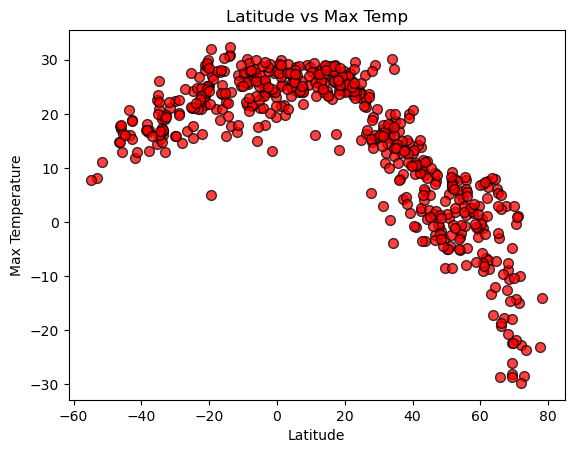

In [9]:
# Build scatter plot for latitude vs. temperature
max_temp = city_data_df['Max Temp']
lat = city_data_df['Lat']

plt.scatter(lat,max_temp, s=50, c='red', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
reg= np.polyfit(lat, max_temp, deg=1)

# Incorporate the other graph properties
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [45]:
#Calculate r value for linear regression
#result=scipy.stats.lineregress(x,y)
reg= np.polyfit(lat, max_temp, deg=1)
reg

array([-0.27949681, 19.67482001])

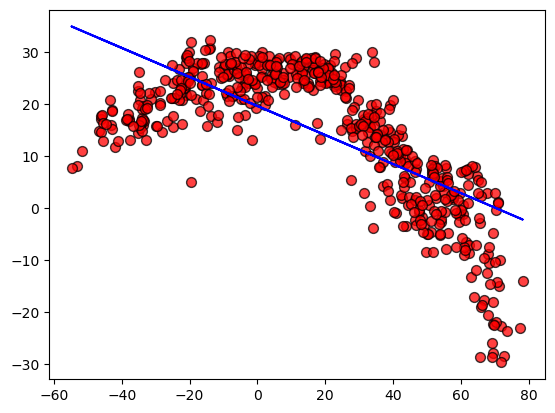

In [46]:
#Caluclate trend line for linear regression 
trend= np.polyval(reg, lat)
plt.scatter(lat, max_temp,s=50, c='red', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.plot(lat, trend, 'b');

#### Latitude Vs. Humidity

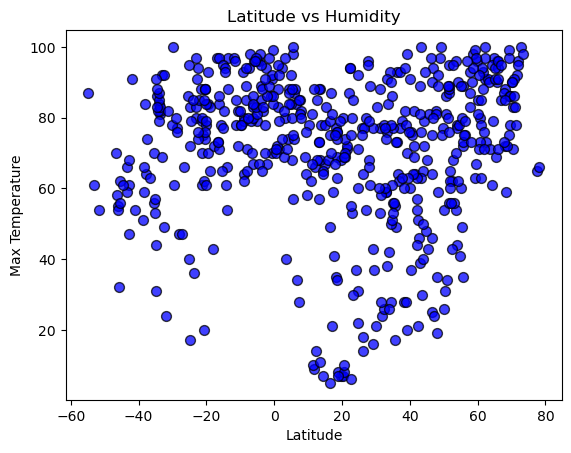

In [47]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

plt.scatter(lat,humidity,s=50, c='blue', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Incorporate the other graph properties
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [48]:
#Calculate r value for linear regression 
reg= np.polyfit(lat, humidity, deg=1)
reg

array([1.35151583e-02, 7.11135468e+01])

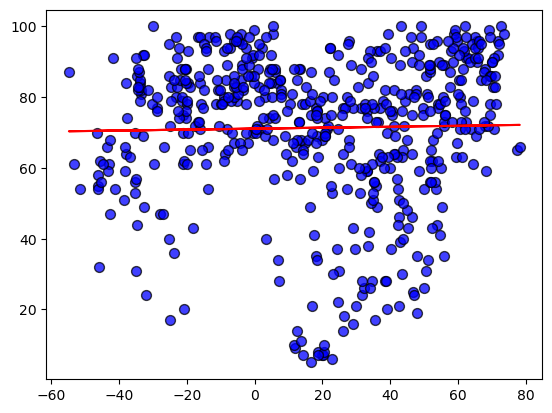

In [49]:
#Calculate trend line 
trend= np.polyval(reg, lat)
plt.scatter(lat, humidity,s=50, c='blue', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.plot(lat, trend, 'r');

#### Latitude Vs. Cloudiness

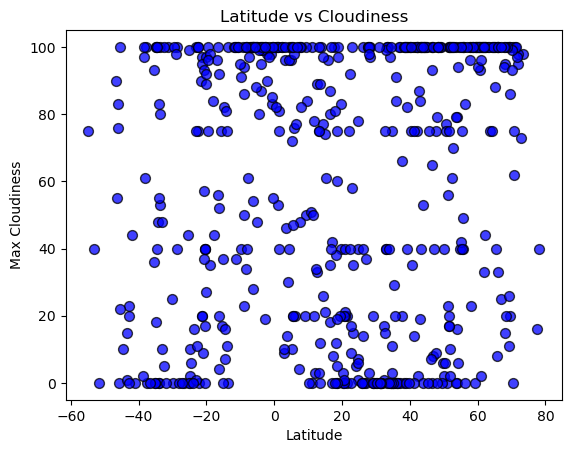

In [50]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness= city_data_df['Cloudiness']

plt.scatter(lat,cloudiness,s=50, c='blue', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Incorporate the other graph properties
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Max Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [51]:
#caculate r value for linear regression
reg= np.polyfit(lat, cloudiness, deg=1)
reg

array([ 0.13791479, 56.57728405])

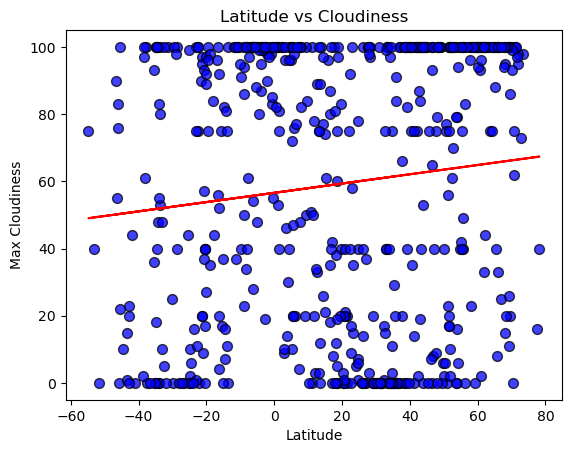

In [52]:
#Calculate trend line 
trend= np.polyval(reg, lat)
plt.scatter(lat, cloudiness,s=50, c='blue', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Max Cloudiness')
plt.plot(lat, trend, 'r');

#### Latitude vs. Wind Speed Plot

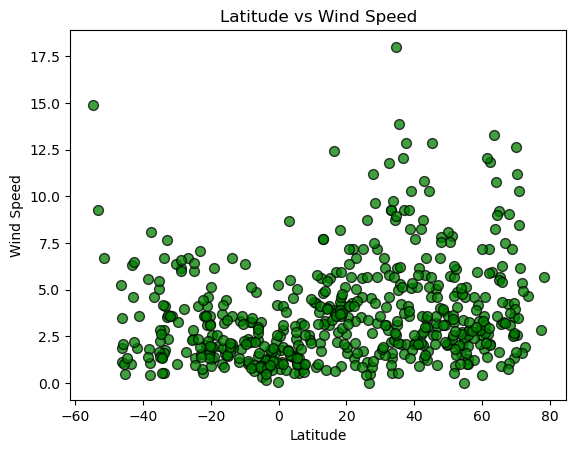

In [53]:
# Build the scatter plots for latitude vs. wind speed
wind_speed= city_data_df['Wind Speed']

plt.scatter(lat,wind_speed,s=50, c='green', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Incorporate the other graph properties
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [54]:
#Calculate r value for linear regression
reg= np.polyfit(lat, wind_speed, deg=1)
reg

array([0.01786842, 3.29148766])

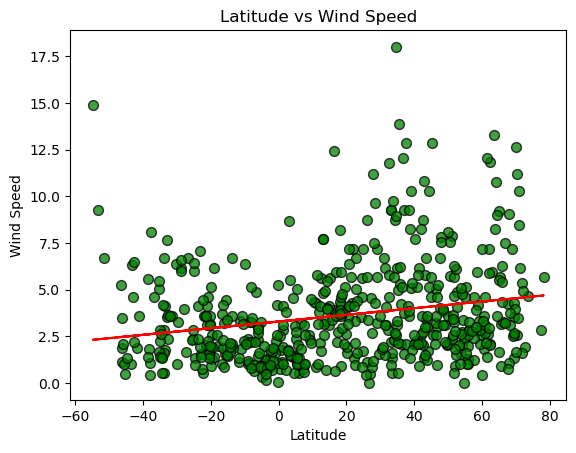

In [55]:
#Calculate trend line 
trend= np.polyval(reg, lat)
plt.scatter(lat, wind_speed,s=50, c='green', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(lat, trend, 'r');

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
#as above for each model 

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,victoria,22.2855,114.1577,25.24,94,92,1.34,HK,1680567829
2,qaanaaq,77.4840,-69.3632,-23.11,65,16,2.86,GL,1680567673
3,avera,33.1940,-82.5271,16.73,76,100,2.20,US,1680568129
6,nakhon phanom,17.3333,104.4167,27.82,59,8,2.19,TH,1680568132
7,kapaa,22.0752,-159.3190,25.99,87,75,7.20,US,1680567980


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,14.89,70,90,5.24,NZ,1680567989
4,mitsamiouli,-11.3847,43.2844,27.26,78,37,3.34,KM,1680568130
5,avarua,-21.2078,-159.7750,28.03,61,20,3.09,CK,1680567891
8,vaini,-21.2000,-175.2000,29.09,70,20,4.12,TO,1680567905
9,busselton,-33.6500,115.3333,16.09,81,53,4.10,AU,1680567882


###  Temperature vs. Latitude Linear Regression Plot

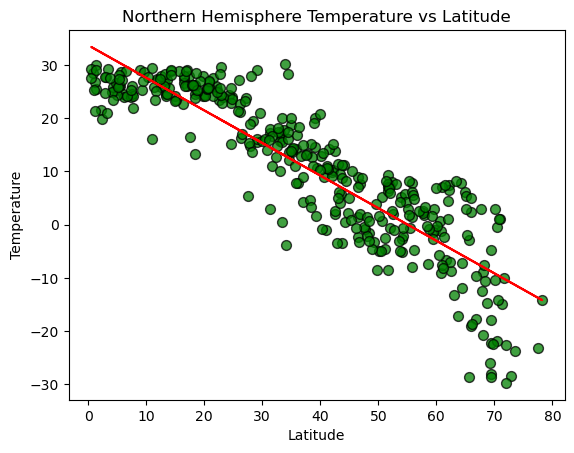

In [59]:
# Linear regression on Northern Hemisphere
# Build the scatter plots for temperature vs latitude 
nh_lat= northern_hemi_df['Lat']
nh_temp= northern_hemi_df['Max Temp']

#Calculate linear regression
reg= np.polyfit(nh_lat, nh_temp, deg=1)
trend= np.polyval(reg, nh_lat)
plt.scatter(nh_lat, nh_temp,s=50, c='green', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.plot(nh_lat, trend, 'r');

# Incorporate the other graph properties
plt.title('Northern Hemisphere Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Show plot
plt.show()

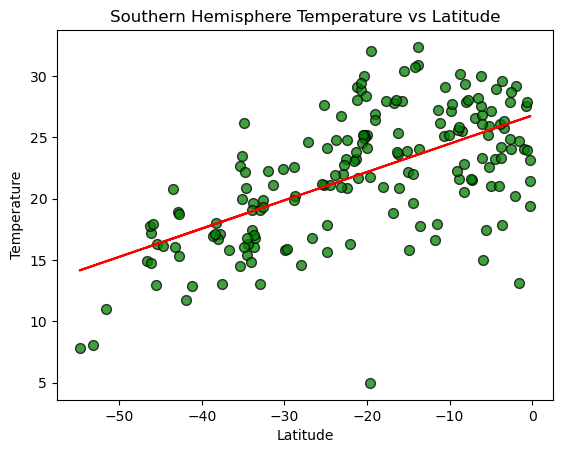

In [60]:
# Linear regression on Southern Hemisphere
sh_lat= southern_hemi_df['Lat']
sh_temp= southern_hemi_df['Max Temp']

#Calculate linear regression
reg= np.polyfit(sh_lat, sh_temp, deg=1)
trend= np.polyval(reg, sh_lat)
plt.scatter(sh_lat, sh_temp,s=50, c='green', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.plot(sh_lat, trend, 'r');

# Incorporate the other graph properties
plt.title('Southern Hemisphere Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

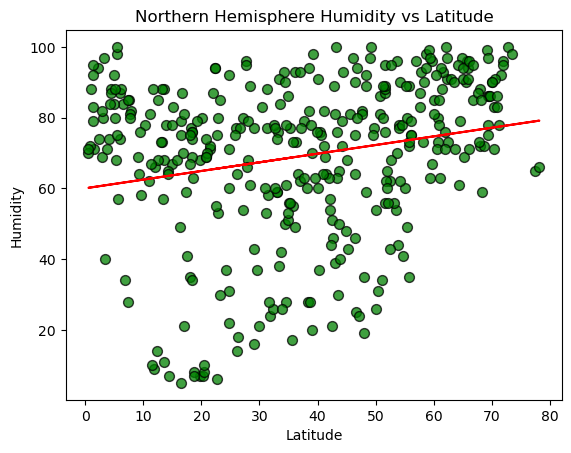

In [61]:
# Build the scatter plots for humidity vs latitude in northern hemisphere 
nh_lat= northern_hemi_df['Lat']
nh_humi= northern_hemi_df['Humidity']

#Calculate linear regression
reg= np.polyfit(nh_lat, nh_humi, deg=1)
trend= np.polyval(reg, nh_lat)
plt.scatter(nh_lat, nh_humi,s=50, c='green', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.plot(nh_lat, trend, 'r');

# Incorporate the other graph properties
plt.title('Northern Hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

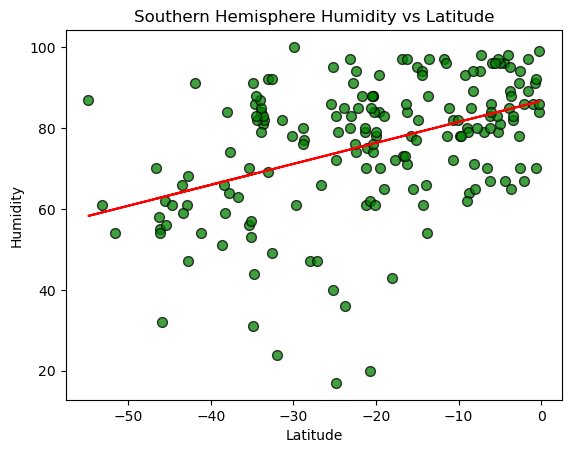

In [62]:
# Southern Hemisphere
# Build the scatter plots for humidity vs latitude in southern hemisphere 
sh_lat= southern_hemi_df['Lat']
sh_humi= southern_hemi_df['Humidity']

#Calculate linear regression
reg= np.polyfit(sh_lat, sh_humi, deg=1)
trend= np.polyval(reg, sh_lat)
plt.scatter(sh_lat, sh_humi,s=50, c='green', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.plot(sh_lat, trend, 'r');

# Incorporate the other graph properties
plt.title('Southern Hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

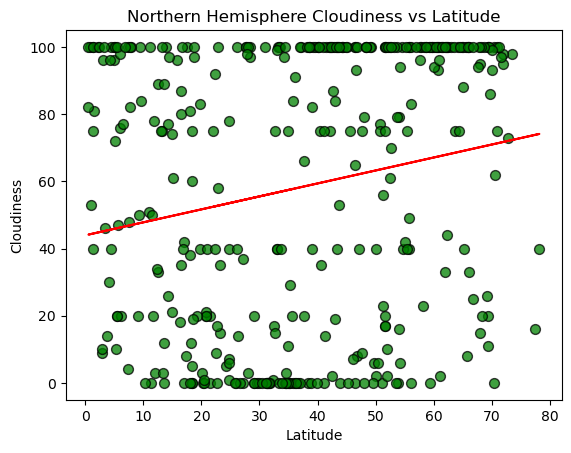

In [63]:
# Northern Hemisphere
nh_lat= northern_hemi_df['Lat']
nh_cloud= northern_hemi_df['Cloudiness']

#Calculate linear regression
reg= np.polyfit(nh_lat, nh_cloud, deg=1)
trend= np.polyval(reg, nh_lat)
plt.scatter(nh_lat, nh_cloud,s=50, c='green', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.plot(nh_lat, trend, 'r');

# Incorporate the other graph properties
plt.title('Northern Hemisphere Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show plot
plt.show()

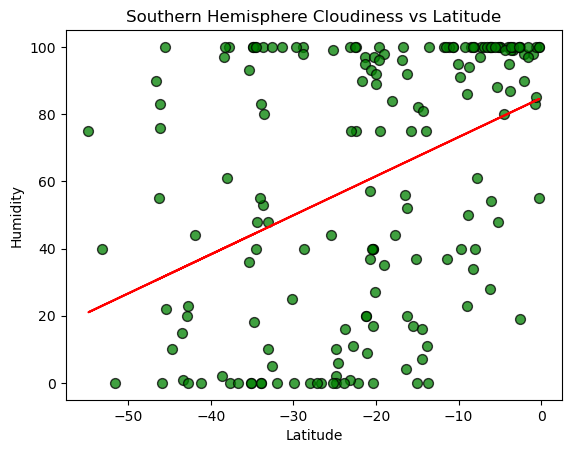

In [64]:
# Southern Hemisphere
# Build the scatter plots for humidity vs latitude in southern hemisphere 
sh_lat= southern_hemi_df['Lat']
sh_cloud= southern_hemi_df['Cloudiness']

#Calculate linear regression
reg= np.polyfit(sh_lat, sh_cloud, deg=1)
trend= np.polyval(reg, sh_lat)
plt.scatter(sh_lat, sh_cloud,s=50, c='green', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.plot(sh_lat, trend, 'r');

# Incorporate the other graph properties
plt.title('Southern Hemisphere Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

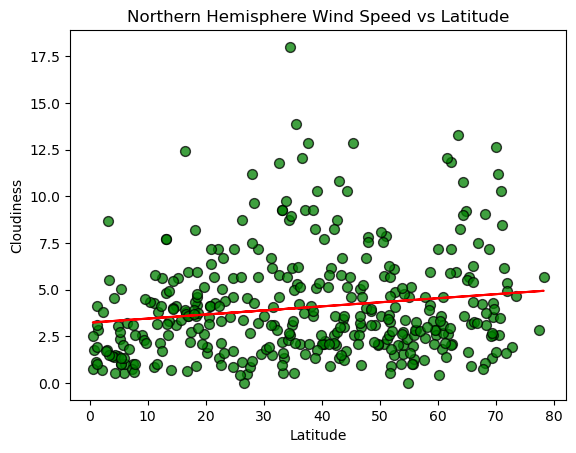

In [65]:
# Northern Hemisphere
nh_lat= northern_hemi_df['Lat']
nh_ws= northern_hemi_df['Wind Speed']

#Calculate linear regression
reg= np.polyfit(nh_lat, nh_ws, deg=1)
trend= np.polyval(reg, nh_lat)
plt.scatter(nh_lat, nh_ws,s=50, c='green', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.plot(nh_lat, trend, 'r');

# Incorporate the other graph properties
plt.title('Northern Hemisphere Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show plot
plt.show()

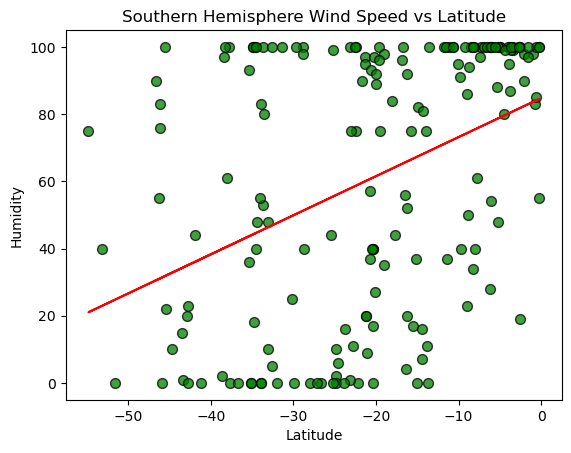

In [66]:
# Southern Hemisphere
# Build the scatter plots for humidity vs latitude in southern hemisphere 
sh_lat= southern_hemi_df['Lat']
sh_ws= southern_hemi_df['Cloudiness']

#Calculate linear regression
reg= np.polyfit(sh_lat, sh_ws, deg=1)
trend= np.polyval(reg, sh_lat)
plt.scatter(sh_lat, sh_ws,s=50, c='green', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.plot(sh_lat, trend, 'r');

# Incorporate the other graph properties
plt.title('Southern Hemisphere Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE